# Ejercicio 1 d: Segmentación de imagenes con algoritmo K-Means Clustering.
Al ser un algoritmo de *clustering*, K-Means es no supervisado, lo cual implica que funciona con datos que no están previamente catalogados. En su lugar busca agrupar a los datos que observa basándose en criterios de cuán similes son. Los datos en un *cluster* son más similares entre sí que a aquellos que pertenecen a otro *cluster*.

En este algoritmo, la *K* representa la cantidad de *clusters* que se utilizarán. Su funcionamiento es el siguiente:
1. Se elige el número de *clusters* (es decir, K).
2. Aleatoriamente, se asignan los pixels o puntos e datos a cualquiera de los K *clusters*.
3. Se calcula el centro del *cluster*.
4. Se calcula la distancia de los pixels al centro de cada *cluster*.
5. Se reasigna cada pixel al cluster de distancia más cercana.
6. Se recalcula el centro de cada *cluster*.
7. Se repiten los pasos 4, 5 y 6 hasta que los pixels no cambien de *cluster*, o hasta el máximo de iteraciones permitido.

## Implementación

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

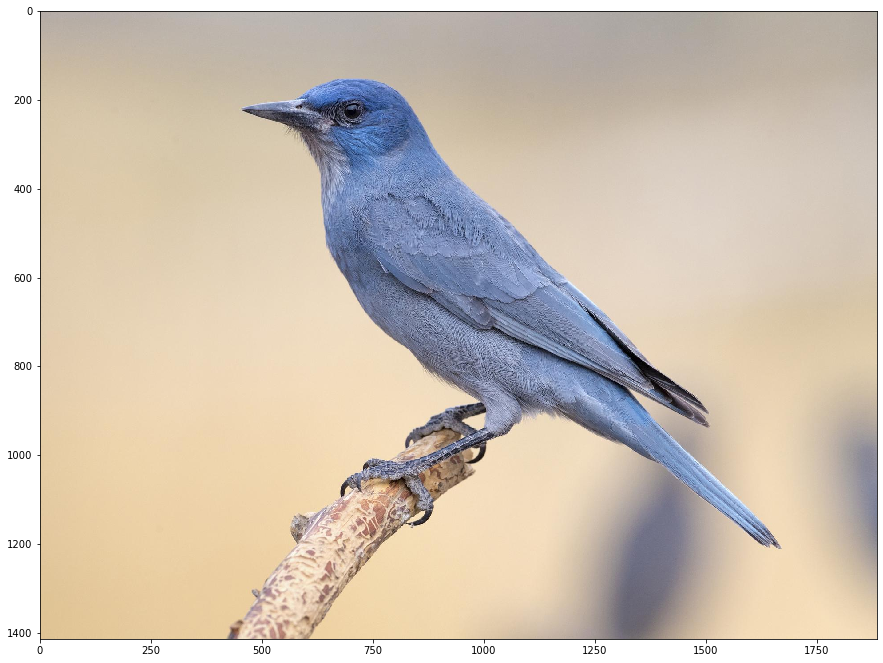

In [3]:
bird = cv2.imread("../resources/bird.jpg")
bird = cv2.cvtColor(bird, cv2.COLOR_BGR2RGB)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.imshow(bird)
plt.show()

Se modifica la estructura del arreglo de pixels para prepararlo para su uso con el algoritmo K-Means. Es necesario que sea un arreglo 2D.

In [5]:
pixel_vals = bird.reshape((-1, 3)).astype(np.float32)
pixel_vals.shape

(2665390, 3)

Ahora se inicia el algoritmo, para el cual se buscará segmentar la imagen en dos clusters ($K = 2$). Se utilizará la implementación de OpenCV, a la cual se le debe dar un criterio de finalización. Este criterio será cuando se llegue a las 100 iteraciones, o que la precisión lograda (el $ \epsilon $) sea del $ 95\% $.

In [41]:
k = 2
criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 1000, 0.85)

retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [42]:
centers = centers.astype(np.float32)
segmented_data = centers[labels.flatten()]

segmented_image = segmented_data.reshape((bird.shape)).astype(int)

In [43]:
list(segmented_image)

[array([[218, 201, 176],
        [218, 201, 176],
        [218, 201, 176],
        ...,
        [218, 201, 176],
        [218, 201, 176],
        [218, 201, 176]]),
 array([[218, 201, 176],
        [218, 201, 176],
        [218, 201, 176],
        ...,
        [218, 201, 176],
        [218, 201, 176],
        [218, 201, 176]]),
 array([[218, 201, 176],
        [218, 201, 176],
        [218, 201, 176],
        ...,
        [218, 201, 176],
        [218, 201, 176],
        [218, 201, 176]]),
 array([[218, 201, 176],
        [218, 201, 176],
        [218, 201, 176],
        ...,
        [218, 201, 176],
        [218, 201, 176],
        [218, 201, 176]]),
 array([[218, 201, 176],
        [218, 201, 176],
        [218, 201, 176],
        ...,
        [218, 201, 176],
        [218, 201, 176],
        [218, 201, 176]]),
 array([[218, 201, 176],
        [218, 201, 176],
        [218, 201, 176],
        ...,
        [218, 201, 176],
        [218, 201, 176],
        [218, 201, 176]]),
 array([[2

Como se puede ver, cada pixel ahora tiene uno de dos posibles valores, indicando a qué *cluster* corresponde. Se procede entonces a representar los dos *clusters* obtenidos en la imagen original, como una máscara.

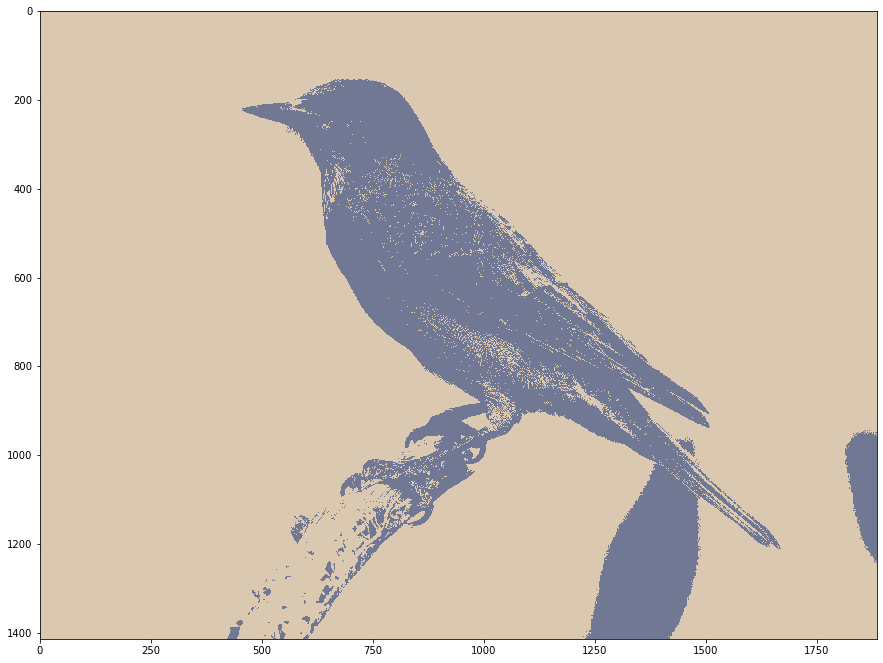

In [44]:
fig = plt.figure()
fig.set_size_inches(15, 15)
plt.imshow(segmented_image)
plt.show()

En la máscara lograda se observa una correcta segmentación del ave, aunque con algunos errores. El principal error es una parte del fondo de la imagen, que dado a que su color original era un gris similar el de algunas partes del ave, el algoritmo lo incluye en le *cluster* junto con ella. Cabe recordar que este inconveniente fue también algo que se observó al segmentar por *colour spaces*, usando HSV. En aquel caso, el problema fue sorteado aplicando una segunda máscara.